In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontManager
import matplotlib.style as style
from matplotlib import cm
#sns.set_context('paper')


In [2]:
# Load Files
b15 = pd.read_csv('Boston_Marathon\m2015.csv')
b16 = pd.read_csv('Boston_Marathon\m2016.csv')
b17 = pd.read_csv('Boston_Marathon\m2017.csv')

In [3]:
b15['Year'] = 2015
b16['Year'] = 2016
b17['Year'] = 2017

In [4]:
data = pd.concat([b15,b16,b17],ignore_index=True,sort=False)
data.set_index('Name',inplace=True)
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.head()

,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
Name,,,,,,,,,,,,,,,,,,,,,
"Desisa, Lelisa",3,25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,...,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015,NaN
"Tsegay, Yemane Adhane",4,30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,...,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015,NaN
"Chebet, Wilson",8,29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,...,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015,NaN
"Kipyego, Bernard",11,28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,...,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015,NaN
"Korir, Wesley",10,32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,...,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015,NaN


In [6]:
data.shape

(79638, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79638 entries, Desisa, Lelisa to Rigsby, Scott
Data columns (total 25 columns):
Bib              79638 non-null object
Age              79638 non-null int64
M/F              79638 non-null object
City             79637 non-null object
State            70645 non-null object
Country          79638 non-null object
Citizen          3440 non-null object
Unnamed: 9       158 non-null object
5K               79638 non-null object
10K              79638 non-null object
15K              79638 non-null object
20K              79638 non-null object
Half             79638 non-null object
25K              79638 non-null object
30K              79638 non-null object
35K              79638 non-null object
40K              79638 non-null object
Pace             79638 non-null object
Proj Time        79638 non-null object
Official Time    79638 non-null object
Overall          79638 non-null int64
Gender           79638 non-null int64
Division         79638 

In [8]:
def isnull(data):
    nulls = pd.concat([data.isnull().sum().to_frame(),data.isnull().sum().to_frame()/data.shape[0]],axis=1)
    nulls.columns = ['Number','Pct']
    nulls = nulls.sort_values(by='Number',ascending=False)
    nulls = nulls[nulls['Number']>0]
    return nulls
    
fonts = [f.name for f in matplotlib.font_manager.fontManager.afmlist]   

def get_Colors():
    colorname, colorid = [],[]
    for name, hex in matplotlib.colors.cnames.items():
        colorname.append(name)
        colorid.append(hex)
    return list(zip(colorname,colorid))

def annotate(ax,s="%.4f"):
    for p in ax.patches:
        ax.annotate(s % p.get_height(), 
                 (p.get_x() + p.get_width() / 2,
                  p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
def despine(rot=0):
    sns.despine(left=True)
    plt.xticks(rotation = rot);
    plt.xlabel('');
    plt.ylabel('');
    
    
def age_group(x):
    if x > 0 and x < 20:
        return '18-20'
    elif  x < 30:
        return '20-30'
    elif  x < 40:
        return '30-40'
    elif  x < 50:
        return '40-50'
    else:
        return '50-84'

In [9]:
nulls = isnull(data)
nulls.drop('Number',axis=1).reset_index()

,index,Pct
0,Unnamed: 8,0.998958
1,Unnamed: 9,0.998016
2,Citizen,0.956805
3,State,0.112923
4,City,0.000013


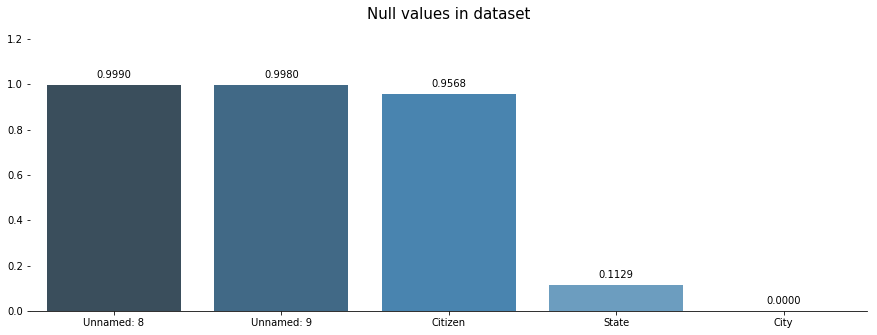

In [10]:
f,ax = plt.subplots(figsize=(15,5))
n1 = sns.barplot(x='index',y='Pct',data=nulls.drop('Number',axis=1).reset_index(),palette=
           'Blues_d')
despine()
annotate(ax=n1)
n1.set_ylim([0,1.2])
n1.set_title('Null values in dataset',fontsize=15,pad=20);

In [11]:
data = data.drop(['Unnamed: 8','Unnamed: 9','Citizen'],axis=1) # Drop Nulls
data.iloc[:, 6:18] = data.iloc[:, 6:18].apply(pd.to_timedelta) # Convert time columns from object to pd time format
data.drop('Proj Time',axis=1,inplace=True) # drop this columns beacuse there are only 0
data['Age Grouped'] = data['Age'].apply(lambda x: age_group(x))
data['Official Time Minutes'] = data['Official Time'].apply(lambda x: x.total_seconds()/60)

In [12]:
data.describe()

,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year,Official Time Minutes
count,79638.000000,79638,79638,79638,79638,79638,79638,79638,79638,79638,79638,79638,79638.000000,79638.000000,79638.000000,79638.000000,79638.000000
mean,42.415166,0 days 00:25:23.000326,0 days 00:50:51.631520,0 days 01:16:47.095042,0 days 01:43:26.880860,0 days 01:49:14.119503,0 days 02:10:49.505864,0 days 02:39:44.614480,0 days 03:09:57.422486,0 days 03:39:58.872422,0 days 00:08:54.086529,0 days 03:53:09.929166,13273.683417,6693.365064,1618.782792,2015.997639,233.165486
std,11.355453,0 days 00:04:11.553378,0 days 00:08:13.351595,0 days 00:12:25.000654,0 days 00:17:18.860885,0 days 00:18:12.861931,0 days 00:22:31.555723,0 days 00:28:19.993863,0 days 00:34:17.595018,0 days 00:39:51.034077,0 days 00:01:35.090340,0 days 00:41:32.272068,7663.512720,3927.594786,1448.369424,0.815852,41.537868
min,18.000000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:04:56,0 days 02:09:17,1.000000,1.000000,1.000000,2015.000000,129.283333
25%,34.000000,0 days 00:22:33,0 days 00:45:09,0 days 01:08:04,0 days 01:31:33,0 days 01:36:39,0 days 01:55:26,0 days 02:20:27,0 days 02:46:34,0 days 03:12:48,0 days 00:07:48,0 days 03:24:18,6637.250000,3319.000000,510.000000,2015.000000,204.300000
50%,42.000000,0 days 00:24:56,0 days 00:49:51,0 days 01:15:07,0 days 01:41:02,0 days 01:46:38,0 days 02:07:27,0 days 02:35:24,0 days 03:04:36,0 days 03:33:48,0 days 00:08:39,0 days 03:46:32,13273.500000,6637.000000,1179.500000,2016.000000,226.533333
75%,50.000000,0 days 00:27:34,0 days 00:55:12,0 days 01:23:16,0 days 01:52:12,0 days 01:58:27,0 days 02:22:06,0 days 02:54:05,0 days 03:27:42,0 days 04:01:07,0 days 00:09:45,0 days 04:15:25,19910.000000,9955.000000,2219.000000,2017.000000,255.416667
max,84.000000,0 days 00:55:50,0 days 01:47:16,0 days 02:41:45,0 days 04:29:40,0 days 04:47:17,0 days 04:36:06,0 days 07:36:38,0 days 06:51:31,0 days 07:59:12,0 days 00:24:30,0 days 10:30:23,26629.000000,14581.000000,6004.000000,2017.000000,630.383333


In [13]:
ym = data.groupby('Year')['Bib'].count().to_frame().reset_index()
ym

,Year,Bib
0,2015,26598
1,2016,26630
2,2017,26410


In [14]:
ym2 = data.groupby(['Year','M/F'])['Bib'].count().to_frame().reset_index()
ym2

,Year,M/F,Bib
0,2015,F,12017
1,2015,M,14581
2,2016,F,12167
3,2016,M,14463
4,2017,F,11972
5,2017,M,14438


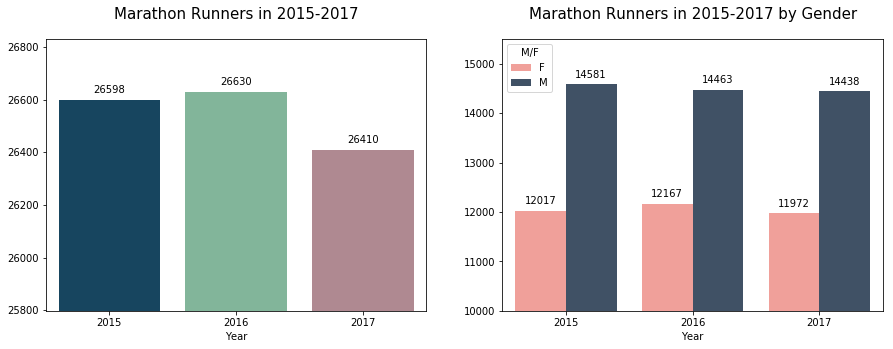

In [15]:
f,ax = plt.subplots(1,2,figsize=(15,5))
y1 = sns.barplot(x='Year',y='Bib',data=ym,
           palette=['#0B486B','#79BD9A','#B5838D'],ax=ax[0])
annotate(ax=y1,s="%.0f")
y1.set_ylabel('')
y1.set_ylim([25798,26830])
y1.set_title('Marathon Runners in 2015-2017',fontsize=15,pad=20);

y2 = sns.barplot(x='Year',y='Bib',data=ym2,hue='M/F',
           palette=['#FE938C','#3A506B'],ax=ax[1])
annotate(ax=y2,s="%.0f")
y2.set_ylabel('')
y2.set_ylim([10000,15500])
y2.set_title('Marathon Runners in 2015-2017 by Gender',fontsize=15,pad=20);

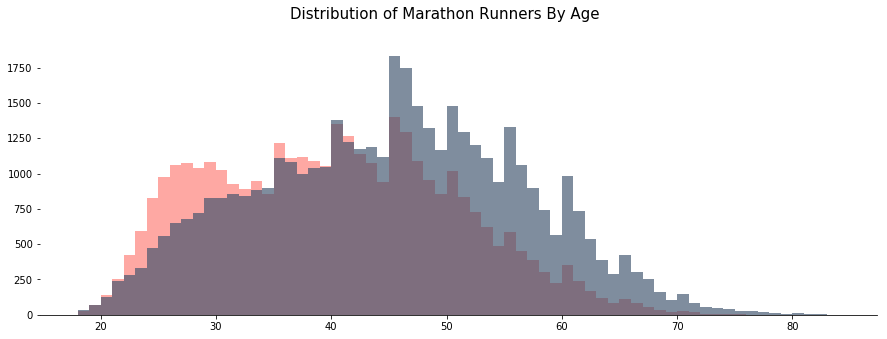

In [16]:
bins1 = round((data[data['M/F']=='F']['Age'].max() - data[data['M/F']=='F']['Age'].min()))
bins2 = data[data['M/F']=='M']['Age'].max() - data[data['M/F']=='M']['Age'].min()
f,ax = plt.subplots(1,1,figsize=(15,5))
# sns.distplot(data[data['M/F']=='F']['Age'],color='#FE938C',bins=bins1)
# sns.distplot(data[data['M/F']=='M']['Age'],color='#3A506B',bins=bins2)
plt.hist(data[data['M/F']=='F']['Age'],color='#FE938C',alpha=0.8,bins=bins1);
plt.hist(data[data['M/F']=='M']['Age'],color='#3A506B',alpha=0.65,bins=bins2);
despine()
plt.suptitle('Distribution of Marathon Runners By Age',fontsize=15);

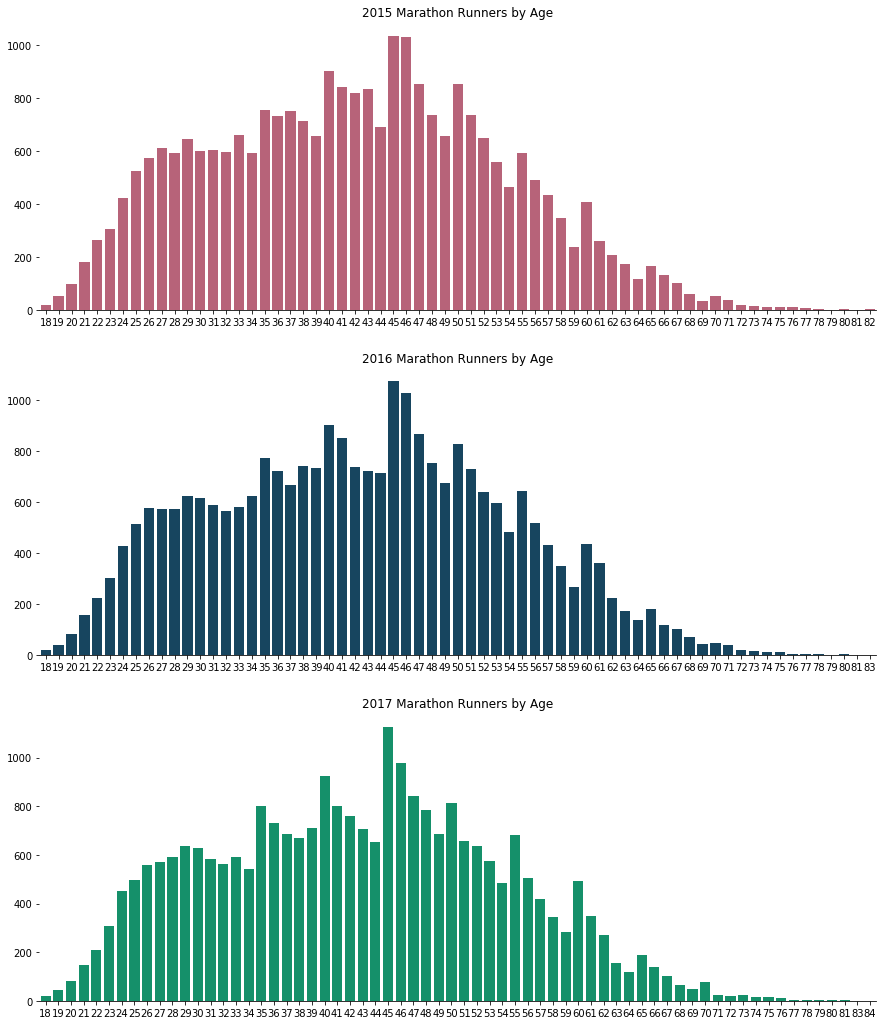

In [17]:
y1,y2,y3 = data[data['Year']==2015],data[data['Year']==2016],data[data['Year']==2017]
f,ax = plt.subplots(3,1,figsize=(15,18))
a1 = sns.countplot('Age',data=y1, palette=['#c55572'],ax=ax[0])
a1.set_title('2015 Marathon Runners by Age')
a1.set_ylabel('');
a1.set_xlabel('');
a2 = sns.countplot('Age',data=y2, palette=['#0B486B'],ax=ax[1])
a2.set_title('2016 Marathon Runners by Age')
a2.set_ylabel('');
a2.set_xlabel('');
a3 = sns.countplot('Age',data=y3, palette=['#00A572'],ax=ax[2])
a3.set_title('2017 Marathon Runners by Age')
a3.set_ylabel('');
a3.set_xlabel('');
despine()


In [18]:
cm = sns.light_palette("#c55572", as_cmap=True)
data.groupby(['M/F','Year'])['Age'].describe().style.background_gradient(cmap = cm)

In [19]:
m = data[data['M/F']=='M']
f = data[data['M/F']=='F']
oldf = f.loc[f['Age'].idxmax()].head(1) # oldest runner Female in 2015,2016,2017
oldm = m.loc[m['Age'].idxmax()].head(1) # oldest runner Male in 2015,2016
pd.concat([oldf,oldm])
# Oldest runner by gender

,Bib,Age,M/F,City,State,Country,5K,10K,15K,20K,...,35K,40K,Pace,Official Time,Overall,Gender,Division,Year,Age Grouped,Official Time Minutes
Name,,,,,,,,,,,,,,,,,,,,,
"Beiers, Katherine",25555,82,F,Santa Cruz,CA,USA,00:36:54,01:14:34,01:54:54,02:36:39,...,04:49:32,05:33:24,00:13:30,05:53:40,26411,11923,1,2015,50-84,353.666667
"Wilson, Harold",24564,82,M,Tyler,TX,USA,00:28:17,00:56:47,01:25:21,01:55:29,...,03:31:53,04:04:23,00:09:51,04:18:00,21626,12387,1,2015,50-84,258.000000


In [20]:
## Youngest Males
#data[data['M/F']=='M'].sort_values(by=['Age','Year'],ascending=True).head()
## Youngerst Females
# data[data['M/F']=='F'].sort_values(by=['Age','Year'],ascending=True).head()

In [21]:
## Oldest Males & Females
of = y3[y3['M/F']=='F']['Age'].nlargest(3).to_frame()
om = y3[y3['M/F']=='M']['Age'].nlargest(3).to_frame()
om['Gender'] = 'Male'
of['Gender'] = 'Female'
yf = y3[y3['M/F']=='F']['Age'].nsmallest(3).to_frame()
ym = y3[y3['M/F']=='M']['Age'].nsmallest(3).to_frame()
ym['Gender'] = 'Male'
yf['Gender'] = 'Female'
pd.concat([of,om])

,Age,Gender
Name,,
"Beiers, Katherine",84,Female
"Bardin, Dorothy",77,Female
"Rigney, Hansi L.",75,Female
"Yoo, Jack",83,Male
"Shimojou, Michiharu",81,Male
"Roake, Samuel C.",81,Male


In [22]:
## Youngest Males & Females
pd.concat([yf,ym])

,Age,Gender
Name,,
"Rucker, Alyssa",18,Female
"Pohl, Elizabeth S.",18,Female
"Georgaklis, Sofia",18,Female
"Eastmond, Riley J",18,Male
"Fickes, Ben",18,Male
"Moore, Ryan D",18,Male


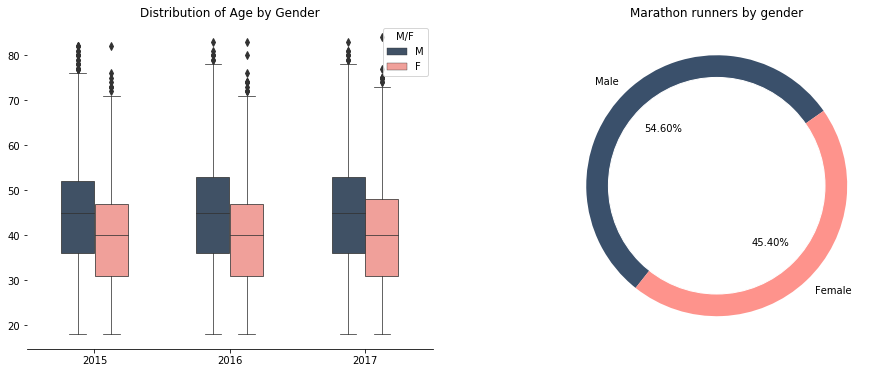

In [23]:
f,ax = plt.subplots(1,2,figsize=(16,6))
b1 = sns.boxplot(y='Age',hue = 'M/F',x='Year',data=data,linewidth=0.75,width=0.5, palette=['#3A506B','#FE938C'],ax=ax[0])
despine()
b1.set_title('Distribution of Age by Gender')
my_circle=plt.Circle( (0,0), 0.83, color='white')
names=['Male','Female']
size=data['M/F'].value_counts().tolist()
plt.pie(size, labels=names, colors=['#3A506B','#FE938C'],autopct='%1.2f%%',startangle=35)
p=plt.gcf()
p.gca().add_artist(my_circle);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.title('Marathon runners by gender');

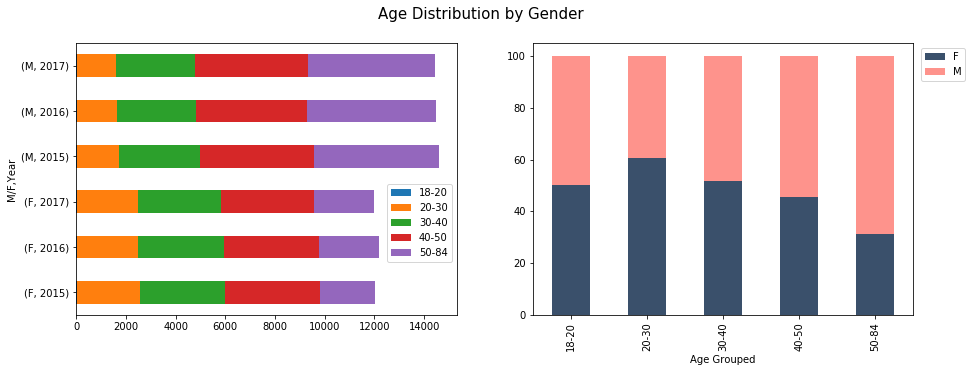

In [24]:
g2=pd.DataFrame(data.groupby(['Year','M/F','Age Grouped'])['Bib'].count())
g3=g2.pivot_table(values='Bib',index=['M/F','Year'], columns='Age Grouped')
df_gr = pd.crosstab(data['Age Grouped'],data['M/F']).apply(lambda x: (x/x.sum()) * 100 , axis=1)
f,ax = plt.subplots(1,2,figsize=(15,5))
g04 = g3.plot(kind='barh',stacked=True,ax=ax[0]);
g04.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5));
g4 = df_gr.plot(kind = "bar", stacked = True, color = ['#3A506B','#FE938C']
                       ,ax=ax[1])
g4.legend(bbox_to_anchor = (1.15, 1));
plt.suptitle('Age Distribution by Gender',fontsize=15);

In [25]:
data.groupby(['M/F','Year'])['Age'].describe()

count       mean        std   min   25%   50%   75%   max
M/F Year                                                             
F   2015  12017.0  39.461846  10.471137  18.0  31.0  40.0  47.0  82.0
    2016  12167.0  39.896030  10.590690  18.0  31.0  40.0  47.0  83.0
    2017  11972.0  39.952974  10.703554  18.0  31.0  40.0  48.0  84.0
M   2015  14581.0  44.356011  11.468329  18.0  36.0  45.0  52.0  82.0
    2016  14463.0  44.716449  11.495371  18.0  36.0  45.0  53.0  83.0
    2017  14438.0  44.772475  11.533255  18.0  36.0  45.0  53.0  83.0

**We can see that 55% of marathon runners were males and 45% females. We can also notice that average age of runner in male group was around 45 and in female group it was 40. So we female runners were younger than males.**  
**We can also notice that with age rises ratio male/female rises**

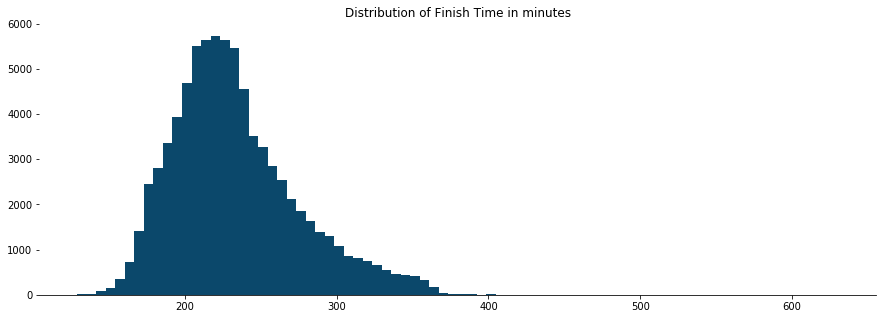

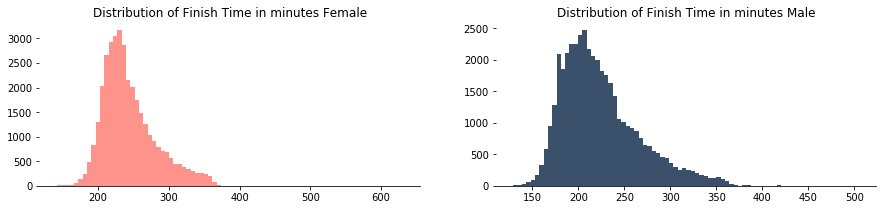

In [26]:
f,ax = plt.subplots(1,1,figsize=(15,5))
g = data['Official Time Minutes'].hist(bins=80,grid=False,color='#0B486B')
g.set_title("Distribution of Finish Time in minutes");
despine()
f,ax = plt.subplots(1,2,figsize=(15,3))
x1 = data[data['M/F']=='F']['Official Time Minutes'].hist(bins=80,grid=False,color='#FE938C',ax=ax[0])
x1.set_title("Distribution of Finish Time in minutes Female");
despine()
x2 = data[data['M/F']=='M']['Official Time Minutes'].hist(bins=80,grid=False,color='#3A506B',ax=ax[1])
x2.set_title("Distribution of Finish Time in minutes Male");

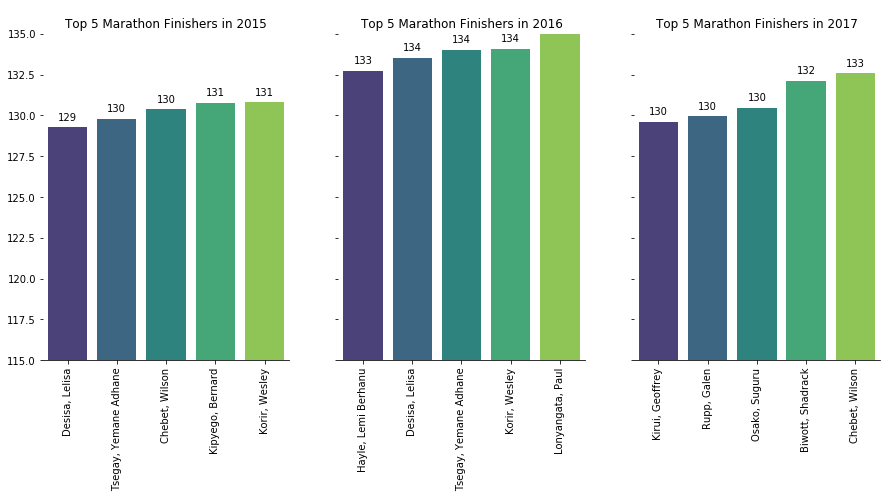

In [27]:
win2015 = data[data['Year']==2015][['Age','M/F','Official Time Minutes']].sort_values(by='Official Time Minutes').head(5)
win2016 = data[data['Year']==2016][['Age','M/F','Official Time Minutes']].sort_values(by='Official Time Minutes').head(5)
win2017 = data[data['Year']==2017][['Age','M/F','Official Time Minutes']].sort_values(by='Official Time Minutes').head(5)
f,ax = plt.subplots(1,3,figsize=(15,6),sharey=True)
r = sns.barplot(y='Official Time Minutes',x=win2015.index,data=win2015,palette='viridis',ax=ax[0])
annotate(ax=r,s="%.0f")
r.set_ylim([115,135]);
despine(rot=90)
r.set_title('Top 5 Marathon Finishers in 2015');

r1 = sns.barplot(y='Official Time Minutes',x=win2016.index,data=win2016,palette='viridis',ax=ax[1])
r1.set_ylabel('')
annotate(ax=r1,s="%.0f")
r1.set_ylim([115,135]);
despine(rot=90)
r1.set_title('Top 5 Marathon Finishers in 2016');

r2 = sns.barplot(y='Official Time Minutes',x=win2017.index,data=win2017,palette='viridis',ax=ax[2])
annotate(ax=r2,s="%.0f")
r2.set_ylim([115,135]);
despine(rot=90)
r2.set_title('Top 5 Marathon Finishers in 2017');

plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90);
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90);

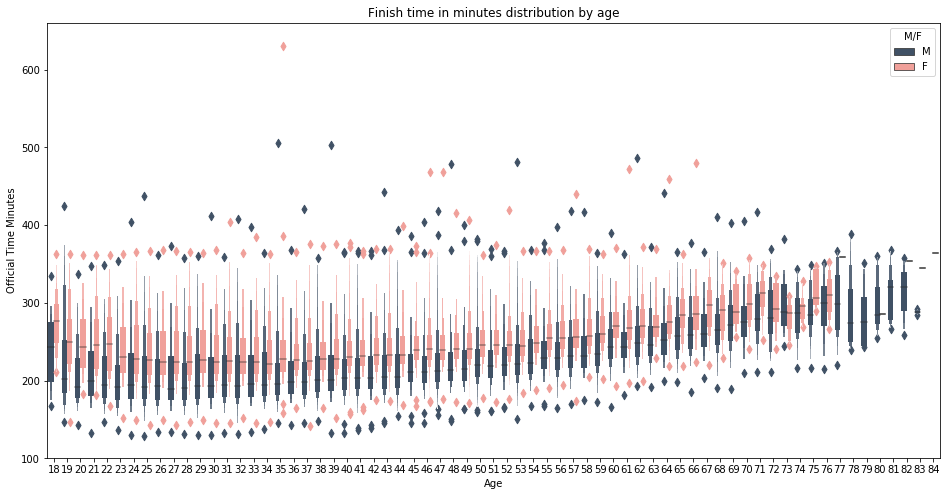

In [80]:
f,ax = plt.subplots(figsize=(16,8))
b = sns.boxenplot(data['Age'], data['Official Time Minutes'],hue=data['M/F'] ,palette=['#3A506B','#FE938C'])
b.set_title("Finish time in minutes distribution by age");

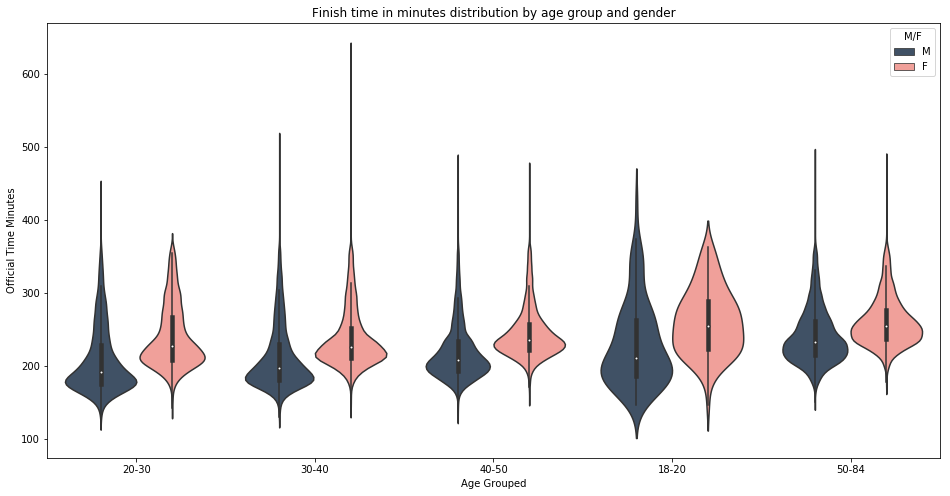

In [29]:
f,ax = plt.subplots(figsize=(16,8))
cc = sns.violinplot(data['Age Grouped'], data['Official Time Minutes'], hue=data['M/F'],palette=['#3A506B','#FE938C'])
cc.set_title("Finish time in minutes distribution by age group and gender");

In [30]:
data.groupby(['Age Grouped','M/F'])['Official Time Minutes'].describe()

count        mean        std         min         25%  \
Age Grouped M/F                                                           
18-20       F      100.0  260.712833  44.860971  147.233333  223.650000   
            M       99.0  229.626768  57.473362  147.183333  186.433333   
20-30       F     7471.0  240.251437  43.075484  142.850000  208.600000   
            M     4871.0  207.541679  45.045340  129.283333  175.866667   
30-40       F    10226.0  236.669713  38.550955  141.866667  211.150000   
            M     9570.0  211.319692  43.452322  129.800000  180.666667   
40-50       F    11372.0  244.245937  33.621426  156.466667  222.416667   
            M    13631.0  218.713154  37.166698  132.750000  193.666667   
50-84       F     6987.0  260.428088  33.215136  172.850000  237.083333   
            M    15311.0  241.212584  37.662394  150.950000  214.600000   

                        50%         75%         max  
Age Grouped M/F                                      
18-20       F    254.266667  288.704167  363.233333  
            M    211.366667  262.283333  424.550000  
20-30       F    227.200000  267.025000  367.366667  
            M    192.266667  229.358333  436.983333  
30-40       F    225.750000  252.150000  630.383333  
            M    196.991667  229.908333  505.150000  
40-50       F    235.841667  257.441667  467.933333  
            M    208.783333  233.616667  478.233333  
50-84       F    254.050000  276.816667  479.550000  
            M    233.183333  261.066667  486.016667

In [31]:
mean_time = data.groupby(['Age Grouped','M/F'])['Official Time Minutes'].mean().reset_index()
mean_time_age = data.groupby(['Age','M/F'])['Official Time Minutes'].mean().reset_index()
mean_time.T

,0,1,2,3,4,5,6,7,8,9
Age Grouped,18-20,18-20,20-30,20-30,30-40,30-40,40-50,40-50,50-84,50-84
M/F,F,M,F,M,F,M,F,M,F,M
Official Time Minutes,260.713,229.627,240.251,207.542,236.67,211.32,244.246,218.713,260.428,241.213


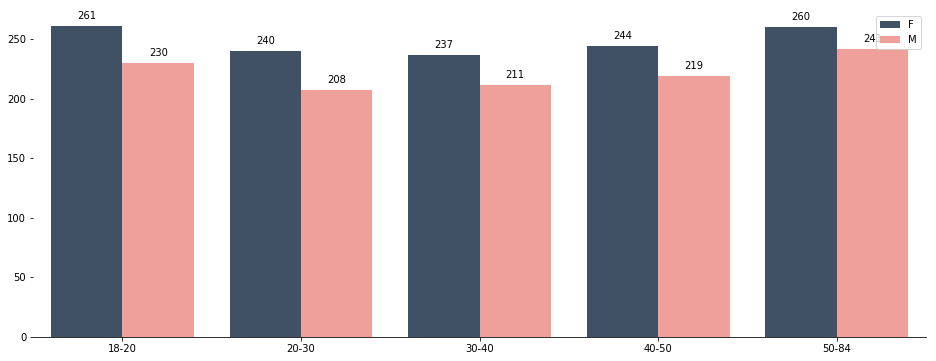

In [32]:
f,ax = plt.subplots(figsize=(16,6))
zx = sns.barplot(x='Age Grouped',y='Official Time Minutes',hue='M/F',data=mean_time, palette=['#3A506B','#FE938C'])
annotate(ax=zx,s="%.0f")
despine()
zx.legend(loc='best');

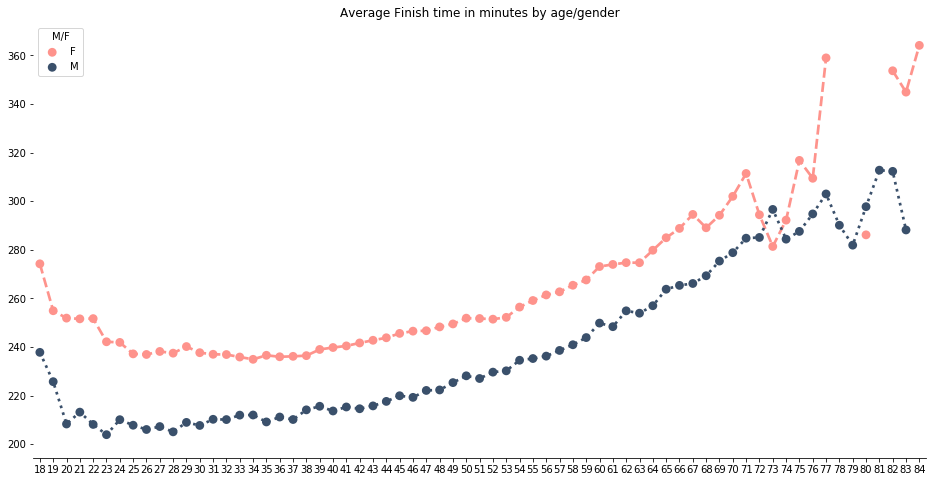

In [33]:
plt.figure(figsize=(16,8))
sns.pointplot(x='Age',y='Official Time Minutes',
              data=mean_time_age,
              #order=years_order,
              hue='M/F',palette=['#FE938C','#3A506B'],markers=["o", "o"],linestyles=["--", ":"]);
plt.title("Average Finish time in minutes by age/gender");
despine()

**We can see that with age rises the average finish time increase too**

In [34]:
fa = data.groupby(['Year','M/F'])['Official Time Minutes'].mean().reset_index()
fa

,Year,M/F,Official Time Minutes
0,2015,F,238.359220
1,2015,M,216.592111
2,2016,F,245.900078
3,2016,M,225.909525
4,2017,F,249.091305
5,2017,M,228.911473


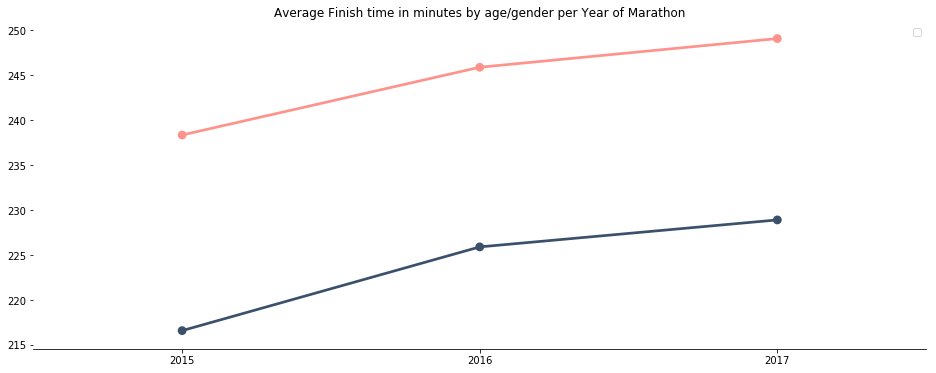

In [35]:
plt.figure(figsize=(16,6))
x0 = sns.pointplot(x='Year',y='Official Time Minutes',
              data=fa,
              #order=years_order,
              hue='M/F',palette=['#FE938C','#3A506B']);

plt.title("Average Finish time in minutes by age/gender per Year of Marathon");
despine()
annotate(ax=x0,s="%.0f")
x0.legend('');

In [36]:
countries = data.groupby(['Country','Year']).count()['Bib'].reset_index().sort_values(by='Bib',ascending=False).head(12)

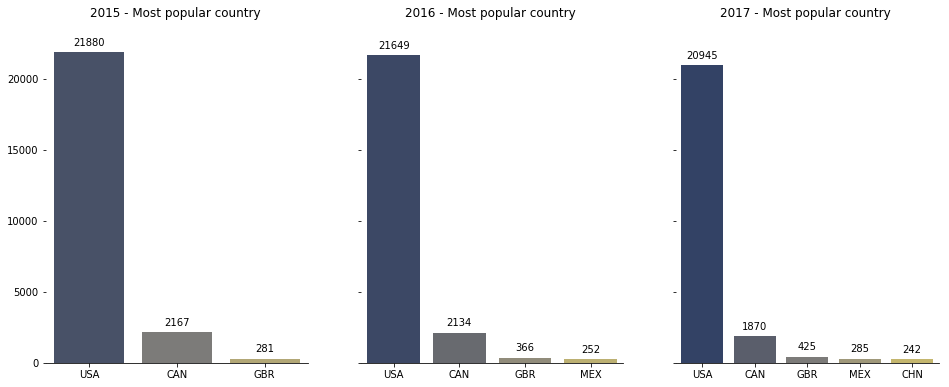

In [37]:
f,ax = plt.subplots(1,3,figsize=(16,6),sharey=True)
c1 = sns.barplot(x='Country',y='Bib',data=countries[countries['Year']==2015],palette='cividis',ax=ax[0])
annotate(ax=c1,s="%.0f")
despine()
c2 = sns.barplot(x='Country',y='Bib',data=countries[countries['Year']==2016],palette='cividis',ax=ax[1])
annotate(ax=c2,s="%.0f")
despine()
c3 = sns.barplot(x='Country',y='Bib',data=countries[countries['Year']==2017],palette='cividis',ax=ax[2])
annotate(ax=c3,s="%.0f")
despine()
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
c1.set_title('2015 - Most popular country ',pad=20);
c2.set_title('2016 - Most popular country ',pad=20);
c3.set_title('2017 - Most popular country ',pad=20);


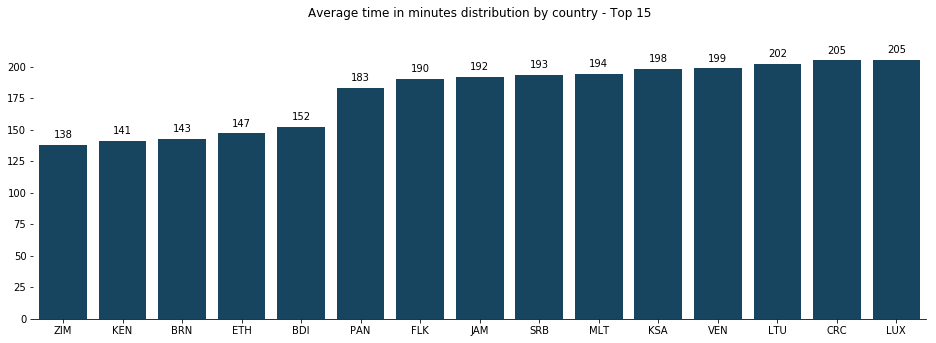

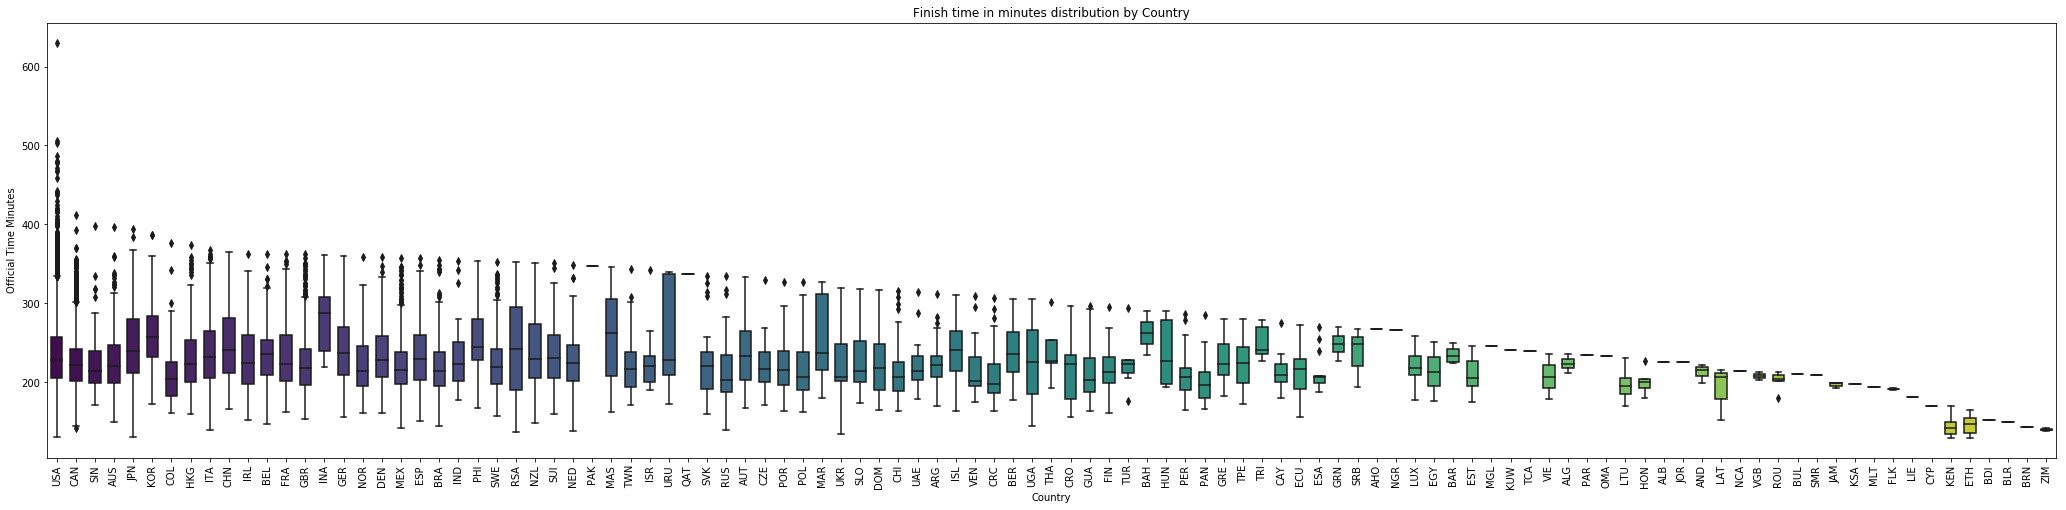

In [76]:
ctr_time = data[data['Year']==2017].groupby('Country').mean()['Official Time Minutes'].reset_index().sort_values(
    by='Official Time Minutes',ascending=True).head(15)

ctr_time

f,ax = plt.subplots(figsize=(16,5))
bc = sns.barplot(x=ctr_time['Country'],y=ctr_time['Official Time Minutes'], palette=['#0B486B'],linewidth=4)
bc.set_title("Average time in minutes distribution by country - Top 15",pad=30);
annotate(ax=bc,s="%.0f")
despine()
data1 = data.sort_values(by='Official Time Minutes',ascending=False)
f,ax = plt.subplots(figsize=(36,8))
bc = sns.boxplot(data1['Country'], data1['Official Time Minutes'], palette="viridis",width=0.6)
bc.set_title("Finish time in minutes distribution by Country");
plt.xticks(rotation=90);

In [39]:
sts = data[data['Year']==2017].groupby(['State']).count()['Bib'].reset_index().sort_values(by='Bib',ascending=False)['State'].tolist()[:15]
states_2017 = data[data['Year']==2017].groupby(['State','M/F']).count()['Bib'].reset_index().sort_values(by=['Bib','State'],ascending=False).head(80)
states_mean = data[(data['State'].isin(sts))].groupby(['State','M/F']).mean()['Official Time Minutes'].reset_index().sort_values(by='Official Time Minutes',ascending=True)

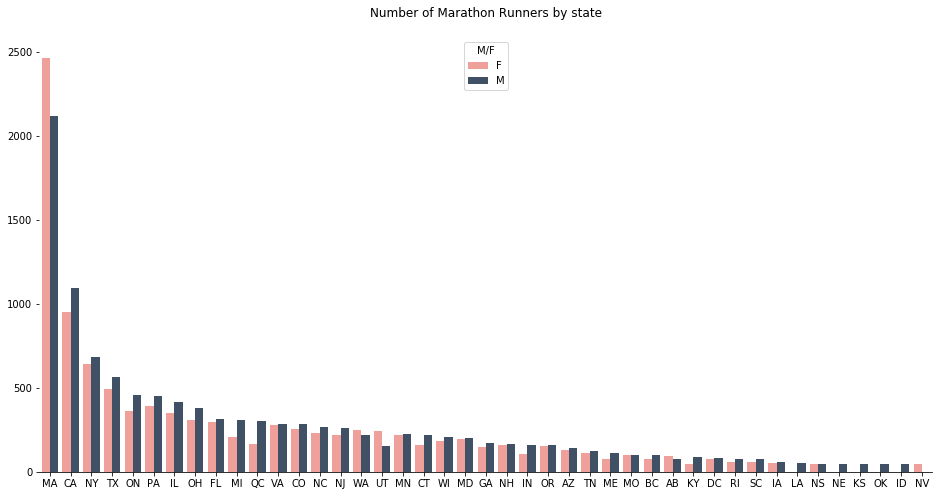

In [40]:
f,ax = plt.subplots(figsize=(16,8))
bs = sns.barplot(x='State',y='Bib', data=states_2017,hue='M/F' ,palette=['#FE938C','#3A506B'])
bs.set_title("Number of Marathon Runners by state",pad=20);
despine()

In [41]:
states_2017.pivot_table(index='State',columns='M/F',values='Bib').dropna().sort_values(by='M',ascending=False).head(20).T

State,MA,CA,NY,TX,ON,PA,IL,OH,FL,MI,QC,VA,CO,NC,NJ,MN,WA,CT,WI,MD
M/F,,,,,,,,,,,,,,,,,,,,
F,2467.0,952.0,641.0,493.0,365.0,390.0,353.0,311.0,294.0,208.0,164.0,281.0,252.0,232.0,217.0,219.0,247.0,160.0,185.0,197.0
M,2119.0,1097.0,683.0,562.0,455.0,452.0,418.0,382.0,315.0,308.0,304.0,283.0,282.0,267.0,259.0,224.0,218.0,217.0,207.0,199.0


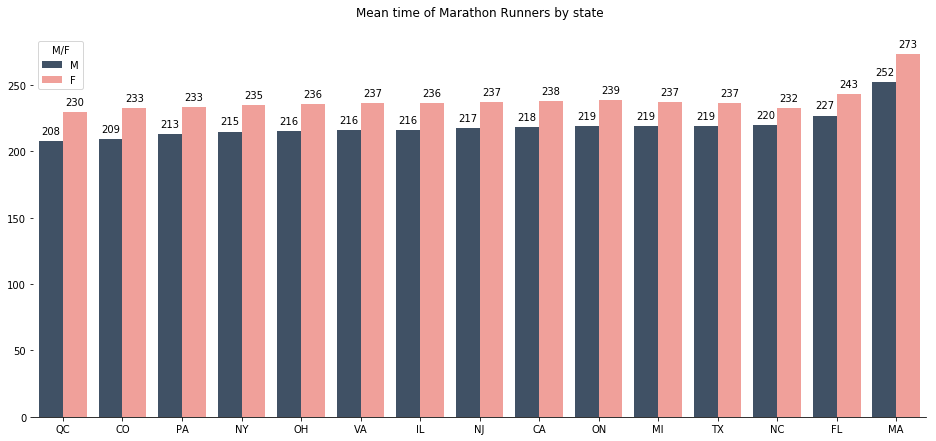

In [42]:
f,ax = plt.subplots(figsize=(16,7))
bs = sns.barplot(x='State',y='Official Time Minutes', data=states_mean,hue='M/F' ,palette=['#3A506B','#FE938C'])
bs.set_title("Mean time of Marathon Runners by state",pad=20);
despine()
annotate(ax=bs,s="%.0f")

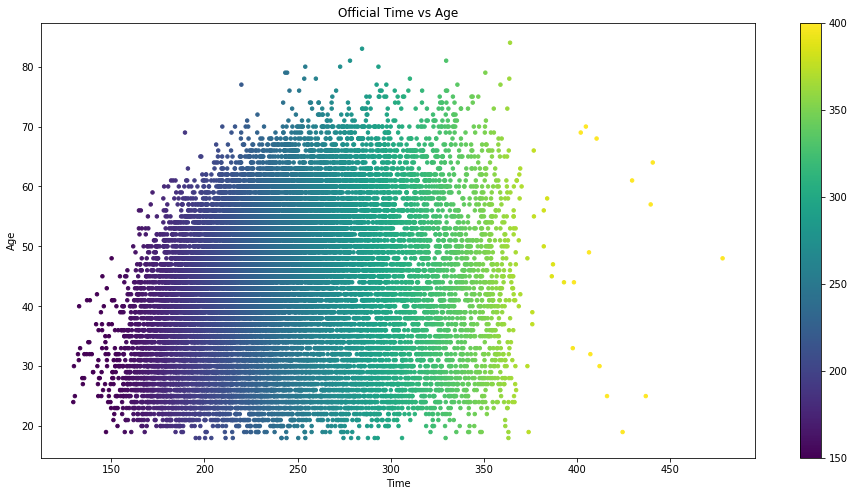

In [73]:
d217 = data[data['Year']==2017]
f, ax = plt.subplots(1, 1, figsize=(16,8))
im = ax.scatter(x=d217['Official Time Minutes'],y=d217['Age'], c=np.clip(d217['Official Time Minutes'], 150, 400), 
                     cmap='viridis', alpha=1.0, s=12)
ax.set_xlabel('Time')
ax.set_ylabel('Age')
cbar = f.colorbar(im, ax=ax)
ax.set_title('Official Time vs Age');


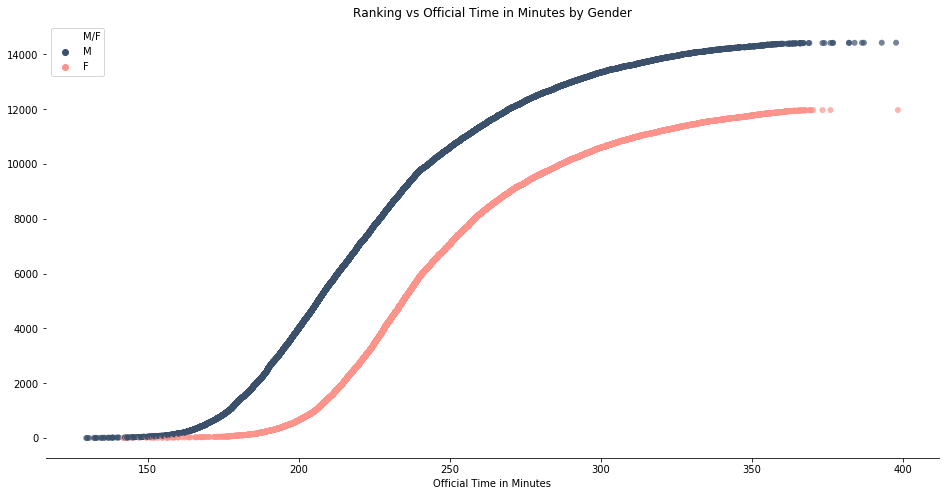

In [106]:
f, ax = plt.subplots(1, 1, figsize=(16,8))
sns.scatterplot(x='Official Time Minutes',y='Gender',
                hue='M/F',data=d217[d217['Official Time Minutes']<400],
                palette=['#3A506B','#FE938C'],marker="o",linewidth=0,alpha=0.7)
plt.title('Ranking vs Official Time in Minutes by Gender');
despine()
plt.xlabel('Official Time in Minutes');

In [137]:
top10 = d217.sort_values(by='Overall').head(10)
top10 = top10[['Age','M/F','Country','5K','10K','20K','30K','40K','Pace']].reset_index()

In [138]:
top10.reset_index()

,index,Name,Age,M/F,Country,5K,10K,20K,30K,40K,Pace
0,0,"Kirui, Geoffrey",24,M,KEN,00:15:25,00:30:28,01:01:15,01:33:01,02:02:53,00:04:57
1,1,"Rupp, Galen",30,M,USA,00:15:24,00:30:27,01:01:15,01:33:01,02:03:14,00:04:58
2,2,"Osako, Suguru",25,M,JPN,00:15:25,00:30:29,01:01:16,01:33:01,02:03:38,00:04:59
3,3,"Biwott, Shadrack",32,M,USA,00:15:25,00:30:29,01:01:19,01:33:01,02:04:35,00:05:03
4,4,"Chebet, Wilson",31,M,KEN,00:15:25,00:30:28,01:01:15,01:33:01,02:05:00,00:05:04
5,5,"Abdirahman, Abdi",40,M,USA,00:15:25,00:30:28,01:01:15,01:33:01,02:05:21,00:05:04
6,6,"Maiyo, Augustus K.",33,M,USA,00:15:25,00:30:29,01:01:15,01:33:01,02:05:41,00:05:05
7,7,"Sefir, Dino",28,M,ETH,00:15:24,00:30:28,01:02:35,01:34:52,02:07:09,00:05:08
8,8,"Puskedra, Luke",27,M,USA,00:15:24,00:30:29,01:01:28,01:34:05,02:07:17,00:05:09
9,9,"Ward, Jared",28,M,USA,00:15:25,00:30:30,01:01:28,01:33:49,02:07:54,00:05:11


In [139]:
melted=pd.melt(top10,id_vars='Name',value_vars=['5K','10K','20K','30K','40K','Pace'])
melted.value = melted.value.apply(lambda x: x.total_seconds()/60)
melted.head()

,Name,variable,value
0,"Kirui, Geoffrey",5K,15.416667
1,"Rupp, Galen",5K,15.400000
2,"Osako, Suguru",5K,15.416667
3,"Biwott, Shadrack",5K,15.416667
4,"Chebet, Wilson",5K,15.416667


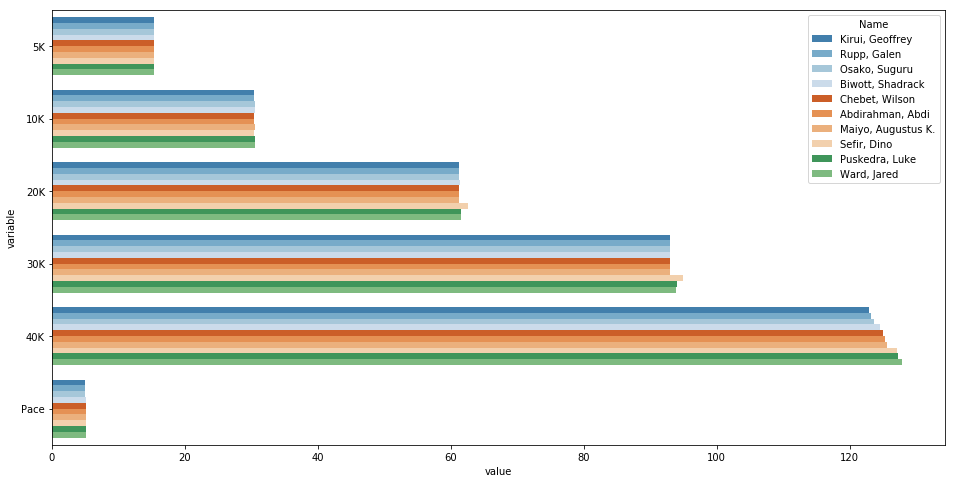

In [159]:
f, ax = plt.subplots(1, 1, figsize=(16,8))
f1 = sns.barplot(y='variable',x='value',hue='Name',data=melted,palette='tab20c')

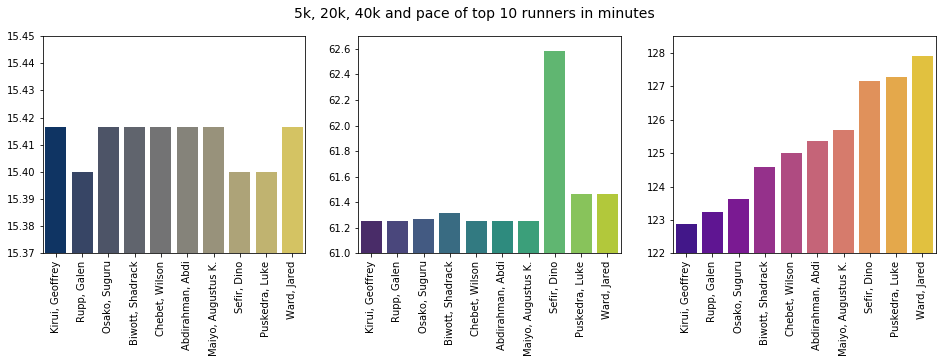

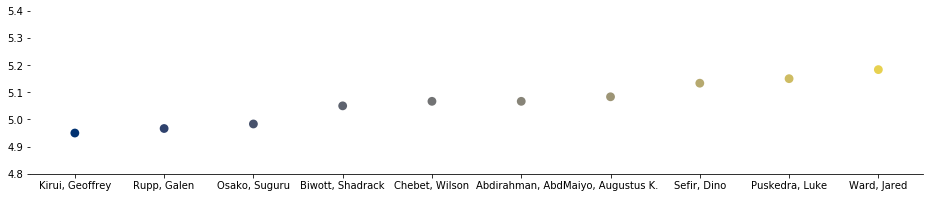

In [221]:
f, ax = plt.subplots(1, 3, figsize=(16,4))
g1 = sns.barplot(x='Name',y='value',data=melted[melted['variable']=='5K'],palette='cividis',ax=ax[0])
g1.set_ylim(15.37,15.45)
g2 = sns.barplot(x='Name',y='value',data=melted[melted['variable']=='20K'],palette='viridis',ax=ax[1])
g2.set_ylim(61,62.7)
g3 = sns.barplot(x='Name',y='value',data=melted[melted['variable']=='40K'],palette='plasma',ax=ax[2])
g3.set_ylim(122,128.5)
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90);
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90);
plt.setp(ax[2].xaxis.get_majorticklabels(), rotation=90);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.suptitle('5k, 20k, 40k and pace of top 10 runners in minutes',fontsize=14);
f, ax = plt.subplots(1, 1, figsize=(16,3))
g4 = sns.pointplot(x='Name',y='value',data=melted[melted['variable']=='Pace'],palette='cividis')
plt.xticks(rotation=90)
g4.set_ylim(4.8,5.4);
#plt.suptitle('5k, 20k, 40k and pace of top 10 runners',fontsize=15);
despine()